In [31]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from numpy import where

In [32]:
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

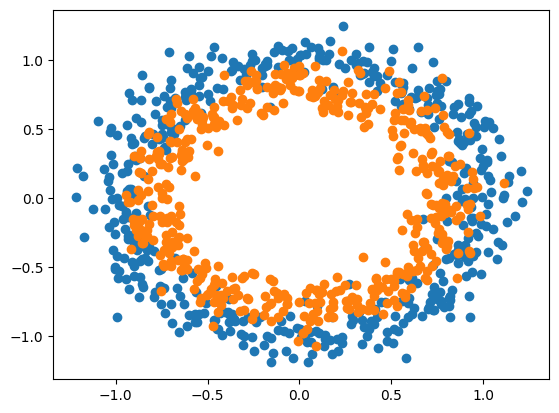

In [33]:
# scatter plot, dots colored by class value
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

In [34]:
# split into train and test
n_test = 500
trainX, testX = X[:n_test, :], X[n_test:, :]
trainy, testy = y[:n_test], y[n_test:]

In [35]:
from keras.models import Sequential
from keras.layers import Activation, Dense

model = Sequential()
model.add(Dense(100, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)

In [38]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.834, Test: 0.852


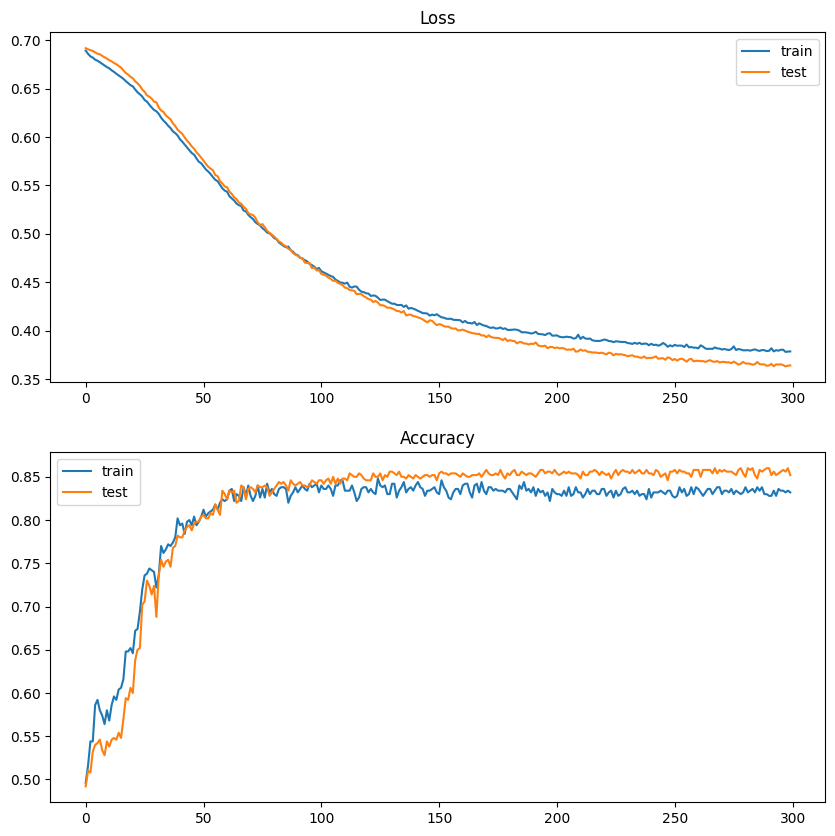

In [39]:
pyplot.figure(figsize=(10,10))
# plot accuracy during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [46]:
import numpy as np

# predict probabilities for test set
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes=np.argmax(yhat_probs,axis=1)

In [4]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=3DJQ3Y9M0DSCRYKHK37H
%env CLEARML_API_SECRET_KEY=981p7Y9QZCiuaUYHGVsUBTmRoNJm3gmdii1s0xznmqRjjoKTp0

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=3DJQ3Y9M0DSCRYKHK37H
env: CLEARML_API_SECRET_KEY=981p7Y9QZCiuaUYHGVsUBTmRoNJm3gmdii1s0xznmqRjjoKTp0


In [5]:
from ultralytics import YOLO

In [6]:
model = YOLO('yolov8n.pt')
 
# Training.
results = model.train(
   data='data.yaml',
   imgsz=1244,
   epochs=10,
   batch=8,
   name='yolov8n_custom')

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11169MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=data.yaml, epochs=10, patience=50, batch=8, imgsz=1244, save=True, cache=False, device=, workers=8, project=None, name=yolov8n_custom, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpli

FileNotFoundError: [34m[1mtrain: [0mError loading data from /home/aya/YOLO/datasets/train/images
See https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data